In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns;
import statsmodels.api as sm
import random
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import pickle

%matplotlib inline

Read the dataset and identify the columns and their datatype

Describe the given dataset.

In [ ]:
df=pd.read_csv('ilpd.csv')
print(df.dtypes)
print(df.describe())
print('\n\n', df.head())

Age            int64
Gender        object
TB           float64
DB           float64
Alkphos        int64
Sgpt           int64
Sgot           int64
TP           float64
ALB          float64
A/G Ratio    float64
Selector       int64
dtype: object
              Age          TB          DB      Alkphos         Sgpt  \
count  583.000000  583.000000  583.000000   583.000000   583.000000   
mean    44.746141    3.298799    1.486106   290.576329    80.713551   
std     16.189833    6.209522    2.808498   242.937989   182.620356   
min      4.000000    0.400000    0.100000    63.000000    10.000000   
25%     33.000000    0.800000    0.200000   175.500000    23.000000   
50%     45.000000    1.000000    0.300000   208.000000    35.000000   
75%     58.000000    2.600000    1.300000   298.000000    60.500000   
max     90.000000   75.000000   19.700000  2110.000000  2000.000000   

              Sgot          TP         ALB   A/G Ratio    Selector  
count   583.000000  583.000000  583.000000  57

I.	Perform pre-processing if required

In [ ]:
for i in df.columns:
  print(i, ":", df[i].isna().sum())

Age : 0
Gender : 0
TB : 0
DB : 0
Alkphos : 0
Sgpt : 0
Sgot : 0
TP : 0
ALB : 0
A/G Ratio : 4
Selector : 0


In [ ]:
#A/G has null values
df['A/G Ratio'].fillna(df['A/G Ratio'].median(), inplace=True)
for i in df.columns:
  print(i, ":", df[i].isna().sum())

Age : 0
Gender : 0
TB : 0
DB : 0
Alkphos : 0
Sgpt : 0
Sgot : 0
TP : 0
ALB : 0
A/G Ratio : 0
Selector : 0


In [ ]:
#Chnaging gender to intger type
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


II.	Draw the heat map

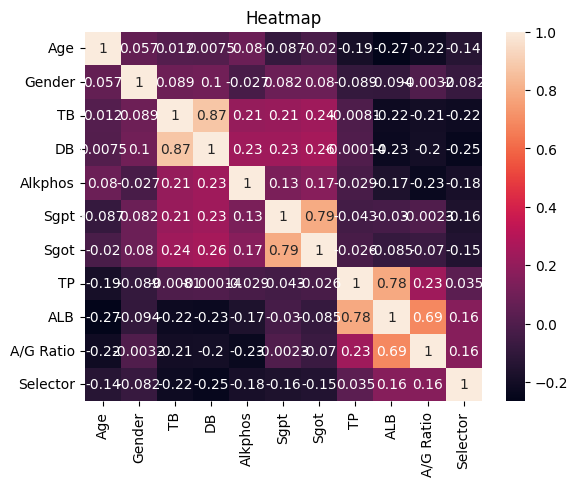

In [ ]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)
plt.title('Heatmap')
plt.show()

III.	Split the dataset into Train and Test.

In [ ]:
X = df.drop('Selector', axis=1).copy()
y = df['Selector'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, shuffle=True, random_state=1)

scaler = MinMaxScaler()
scaler.fit(X_train)
train_x=scaler.transform(X_train)

IV.	Apply Decision Tree on the data

In [ ]:
model = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

V.	Display the classification metrics

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6852248394004282


VI.	Perform cross validation using cross

In [ ]:
all=cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print(all)
print('Mean = ', all.mean())

[0.66666667 0.82608696 0.82608696 0.65217391 0.73913043]
Mean =  0.7420289855072463
